In [98]:
### 
# EDA & Statistical Project - MaxGet Insurance Company
###
#
# MaxGet is an Insurance Company.
# Before they launch their new plan, they would like to understand statistically, what will be performance of the New Plan.
# 
###
# Objectives
###
#
# 1. Explore the dataset (MaxGetInsurance) and extract insights from the data using EDA
# 2. Prove (disprove) that Medical Claims made by the people who smoke is greater than those who don't.
# 3. Prove (disapprove) with Statistical Evidence that the BMI of Females is different from that of Males.
# 3. Is the proportion of smokers significantly different across different regions ?
# Hint : Create a contingency table/cross table using the function : stats.chi2_contingency()
# 4. Is the proportion of smokers different across different regions?
# 5. Is the MEAN BMI of Women with no children, once child and two children the same ?
# Explain your answer with statistical evidences.
#
###
# ASSUMPTIONS
###
#
# The Health Insurance Customer's data is a simple random sample from the population data.
#

In [99]:
### 
# 1. Explore the dataset (MaxGetInsurance) and extract insights from the data using EDA
###
# EDA - Step By Step Approach
###
#
# 1. Importing Libraries and Data
# 2. Variable Identification
# 3. Univariate Analysis
# 4. Bivariate Analysis
# 5. Variable Transformation / Feature Creation

In [1]:
###
# 1. Importing Libraries and Data
###
#
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###
# Import Statistics Modeling
###
#
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
import warnings
warnings.filterwarnings("ignore")
#
# Setting up the directory folder to call/invoke data file "MaxGetInsurance.csv"
#
import os
os.chdir("C:/Users/njoshi3/Documents/Data Science/NSArrows/")
#
###
#
# If importing data from Google Drive, Use below code
# from google.colab import drive
# drive.mount('/gdrive')
# %cd / gdrive/My Drive/Folder1/Folder2/
#
###
# Setting Default Seaborn Style for Plots
###
#
sns.set()
#
### Read Data File
#
data=pd.read_csv("MaxGetInsurance.csv")
#

In [2]:
###
# Copying the dataset "data" into "df" to avoid changes to the main dataset
###
#
df = data.copy()
#

In [3]:
###
# Display Dataset Information / Variable Identification
###
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age       1338 non-null int64
gender    1338 non-null object
bmi       1338 non-null float64
kids      1338 non-null int64
smoker    1338 non-null object
region    1338 non-null object
claims    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
### 
# 2. Variable Identification
# MaxGetInsurance Dataset Information
###
#
# Variable - age - This is an integer indicating the age of beneficiary
# (assuming - excluding those who are above 64 considering they are covered by Government) 
# Variable - gender - This is Policy holder's gender, male or female 
# (assuming - excluding those who are transgenders)
# Variable - bmi - This is the Body Mass Index which porvides a sense of how over or under weight
# the beneficiary is relative to their height.
# BMI = Square (Individual's Weight (in kilogram) / Individual's Height (in sq meter)). 
# An ideal BMI is within range of 18.5 to 24.9.
# Variable - kids - This is an integer indicating the number of children / dependents covered by the insurance plan
# Variable - smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
# Variable - region - This is the beneficiary's place of residence in the U.S. divided into
# four geographic regions like North, South, East, West.
# Variable - claims - Individual Medical cost billed by health insurance.

In [5]:
# Know the shape of "MaxGetInsurance"
#
df.shape

(1338, 7)

In [6]:
###
# looking at the .head() and .tail() to derive some understanding & observation at high level
###
#
pd.set_option("display.max_columns",None)        # To display values of all columns rather than limited columns
df.head()                                        # To display first 5 observations from the databset

,age,gender,bmi,kids,smoker,region,claims
0,19,female,27.900,0,yes,east,16884.92400
1,18,male,33.770,1,no,south,1725.55230
2,28,male,33.000,3,no,south,4449.46200
3,33,male,22.705,0,no,west,21984.47061
4,32,male,28.880,0,no,west,3866.85520


In [7]:
df.tail()                                        # To display last 5 observations from the dataset

,age,gender,bmi,kids,smoker,region,claims
1333,50,male,30.97,3,no,west,10600.5483
1334,18,female,31.92,0,no,north,2205.9808
1335,18,female,36.85,0,no,south,1629.8335
1336,21,female,25.80,0,no,east,2007.9450
1337,61,female,29.07,0,yes,west,29141.3603


In [8]:
### 
# MaxGetInsurance Dataset Information :
###
# 1338 Observations with 7 variables
# 4 Integer fields and 3 object fields
# There is no NULL Data/Missing Data.
# 73.2 KB consumed by dataset

In [9]:
###
# Object columns should be converted into Categorical type
# It helps in reducing the storage used by dataset &
# every class in categorical column will be represented by a number under the hood.
# This is useful during model building in future.
###
#
df['gender'] = df['gender'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age       1338 non-null int64
gender    1338 non-null category
bmi       1338 non-null float64
kids      1338 non-null int64
smoker    1338 non-null category
region    1338 non-null category
claims    1338 non-null float64
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [11]:
###
# Check For Missing Values using isna() function
#
df.isna().sum()

age       0
gender    0
bmi       0
kids      0
smoker    0
region    0
claims    0
dtype: int64

In [12]:
### 
# There are no missing values in data set "MaxGetInsurance".
###

In [13]:
# Displaying 5 Point Summary of Continuous Variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
kids,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
claims,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [14]:
###
# 5 Point Summary Analysis of dataset
###
#
# MaxGetInsurance sample dataset looks in great control; statistics seems reasonable.
# Variable -age- ranging from 18 to 64 with an average of 39. Shows all population as adult considering all 18 and above.
# Variable -bmi- ranges from 16 to 53. 
# Fitness perspective, 
#    a) Upto 25% population within healthy BMI range of 18 to 25 (tentative/close by).
#    b) Nearly 26% to 75% population BMI ranges OUTSIDE of helalthy BMI zone.
#    c) Considering Max is 53+ BMI and upto 75% are within 35 BMI, there are few in danger zone for sure who are above 35 upto max.
# Variable -kids- Upto 25% beneficiary do not have Kids for sure. 
#                 Upto 50% beneficiary have 0 or 1 kid.
#### Does it relate to 25% in Healthy BMI ? Further analysis will help here.
#                Upto 75%, 2 or less kids; however, Minimum 0 and maximum 5 kids.
# Overall it looks good data except Claims Data.
# Variable -claims- Claims are highly skewed positive/right side where MEAN 13270.
#                   Median (less than MEAN) is just 9382 where as Max is 63770. 
#                   That means most people would require basic medicare and only few suffer from diseases which cost more.
#
###
## Negative skewness // Mean < Median < Mode
## Zero skewness     // Mean = Median = Mode
## Positive skewness // Mean > Median > Mode

In [15]:
###
# Displaying 5 Point Summary of Categorical data
###
df.describe(include="category")

,gender,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,south
freq,676,1064,364


In [16]:
###
# Variable -gender- Gender data indicates there are two unique genders in beneficiaries.
#                Out of 1338 beneficiaries, 676 are MALE and remailing 662 are FEMALEs.
# Variable -smoker- 1064 Non-Smokers are there as per dataset; and maximum coming from South region.
# Gender is equally distributed among data. Non-Smoker's are nearly 80%+
# Variable -region- Beneficiaries are spread between 4 unique regions. South is region of major beneficiaries population.
###

In [17]:
###
# EDA Begins
###
#
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.

def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature : 1-d feature array
    figsize : size of fig (default (9,8))
    bins    : number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

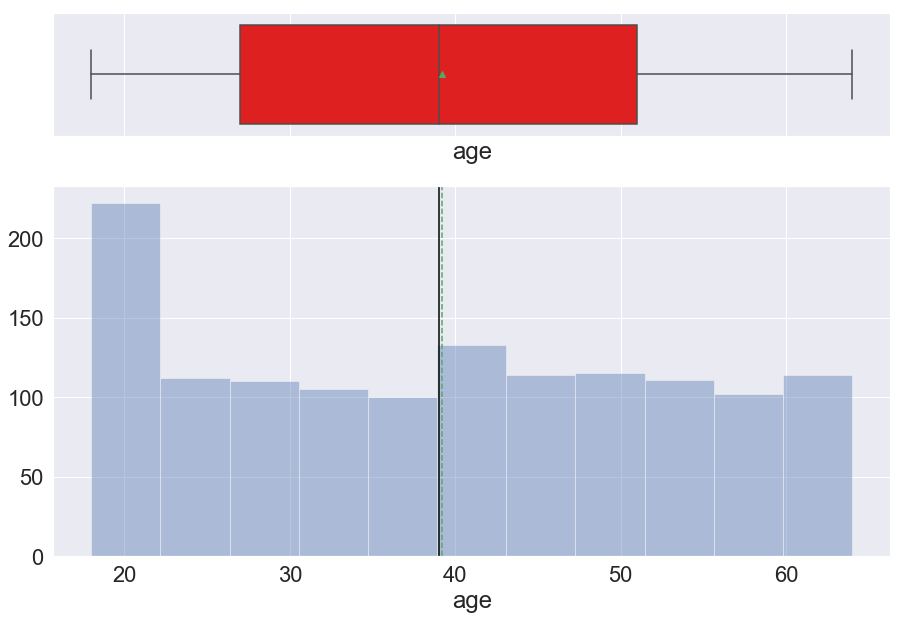

In [18]:
###
# 3. Univariate Analysis
###
# Creating Histogram & Boxplot based on Age
histogram_boxplot(df['age'])

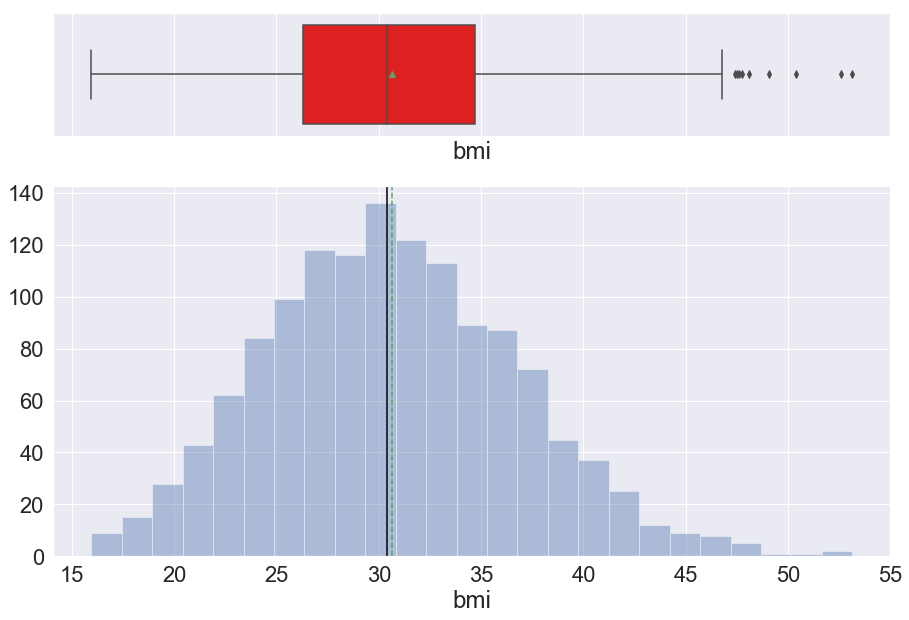

In [19]:
###
# 3. Univariate Analysis
###
# Creating Histogram & Boxplot based on Age
histogram_boxplot(df['bmi'])

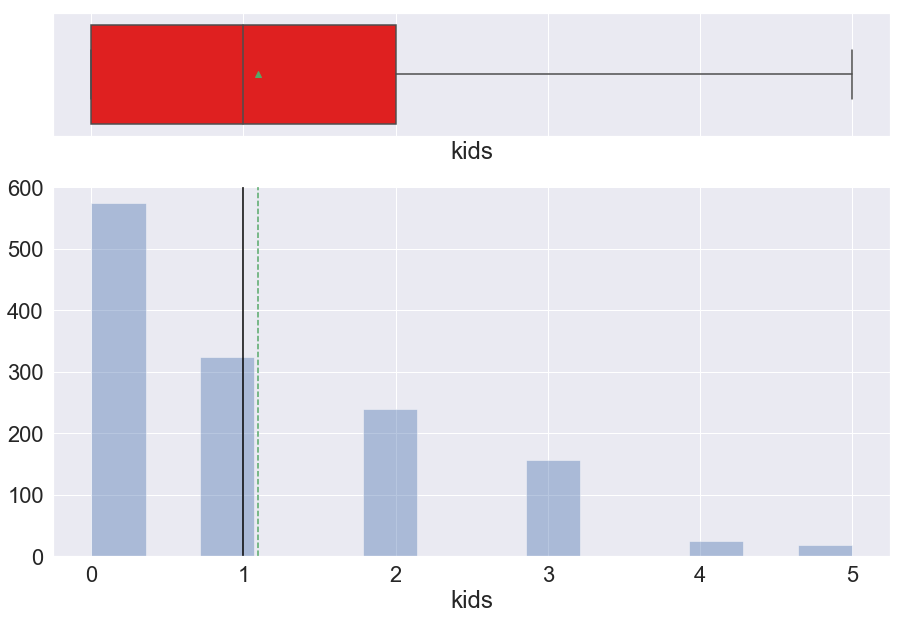

In [20]:
###
# 3. Univariate Analysis
###
# Creating Histogram & Boxplot based on Age
histogram_boxplot(df['kids'])

In [21]:
###
# Observations
###
#
# Age seems uniformly distributed, with both MEAN and MEDIAN around 40. 
# 50% beneficiaries are less than 40 years of age. There are no outliers in AGE of beneficiaries.
# BMI Looks fairly normal distribution. ALthough, there are few Outliers.
# Looks like nearly 800 beneficiaries in the range of bmi 25 to 35. BMI above 25 is not healthy sign.
# Number of Kids has Right skewed distribution considering MEAN > MEDIAN.
# Plot suggests nearly 600 beneficiaries have 0 kid, 300+ have 1, 200+ have 2, 150+ have 3, very few have 4 and 5 kids.
# The plot suggest we should convert kids to Categorical Variable for further analysis.
#

In [22]:
# Converting Children To Categorical Variable
df['kids'] = df['kids'].astype('category')

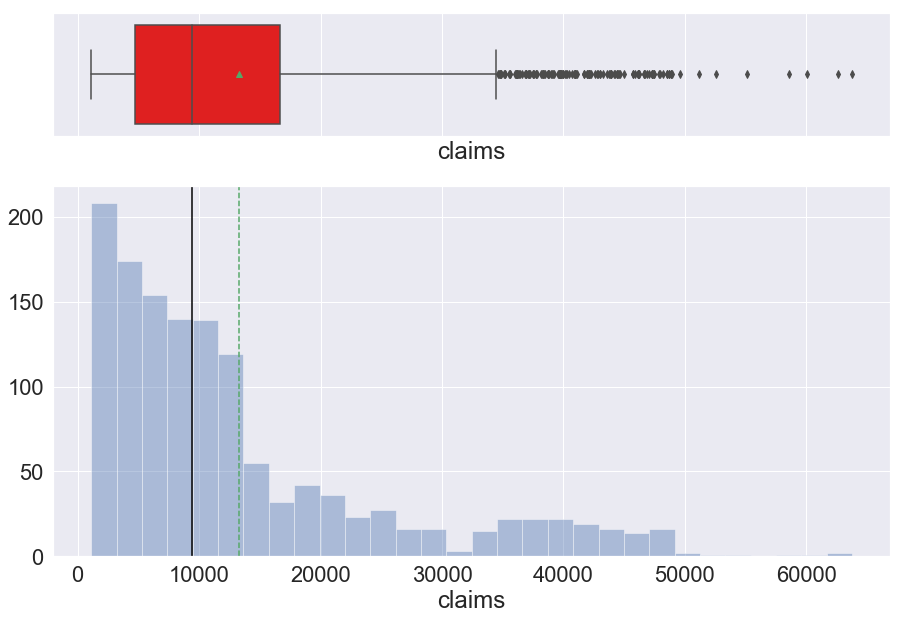

In [23]:
###
# 3. Univariate Analysis
###
# Creating Histogram & Boxplot based on Claims
histogram_boxplot(df["claims"])

In [24]:
###
# 
# Claims data are highly skewed, right side considering MEAN > MEDIAN.
# Nearly 700 beneficiaries Claims less then / equal to MEDIAN value; that mean (disciplined/controlled) claims.
# It's showing lots of Outliers towards higher end indicating that some people spend higher for their medicals.
#
###

In [25]:
## Univariate Analysis With Categorical Values
#
# Function To Create Barplots that indicate percentage for each category.
def bar_perc(plot,feature):
    '''
    plot feature : 1-d categorical feature array 
    '''
    total = len(feature) # Length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage,(x,y),size=12)    # annotate the percentage

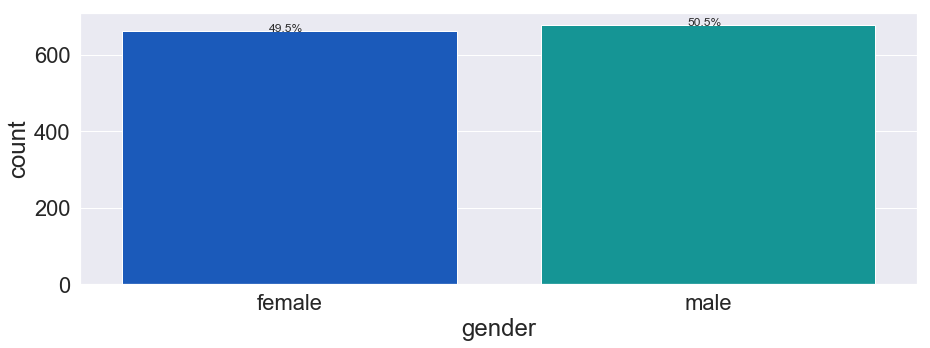

In [26]:
###
# 3. Univariate Analysis of Categorical Variables
###
# Creating Count Plot based on Gender
#
plt.figure(figsize=(15,5))
ax = sns.countplot(df["gender"],palette="winter")
bar_perc(ax,df["gender"])

In [27]:
###
# The distribution of observation across genders is fairly same as we saw earlier.
###

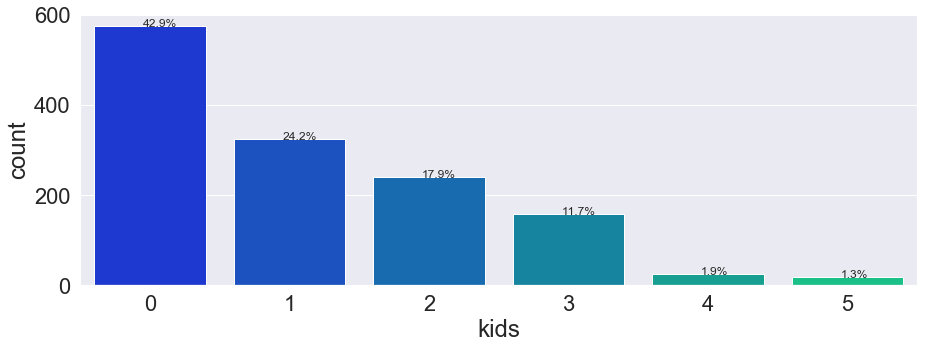

In [28]:
###
# 3. Univariate Analysis of Categorical Variables
###
# Creating Count Plot based on Kids
#
plt.figure(figsize=(15,5))
ax = sns.countplot(df["kids"],palette="winter")
bar_perc(ax,df["kids"])

In [29]:
###
# Nearly 43% beneficiaries do not have any kids.
# Nearly 24% beneficiaries do have 1 kid.
# Nearly 18% beneficiaries have 2 & 12% have 3 kids.
# Less than 2% each beneficiaries 4 or 5 kids.
###

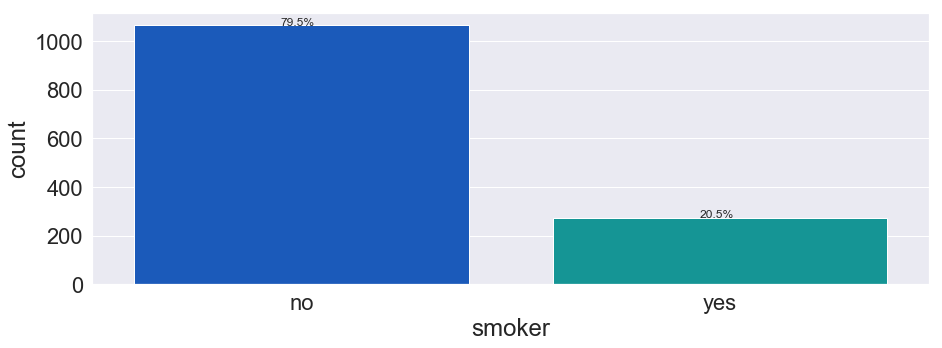

In [30]:
###
# 3. Univariate Analysis of Categorical Variables
###
# Creating Count Plot based on Smoker
#
plt.figure(figsize=(15,5))
ax = sns.countplot(df["smoker"],palette="winter")
bar_perc(ax,df["smoker"])

In [31]:
###
# As mentioned earlier, nearly 80% beneficiaries are Non-Smoker. 20% are smoker.
# Further analysis can be done to see how this 20% smoker affects the insurance claims.
###

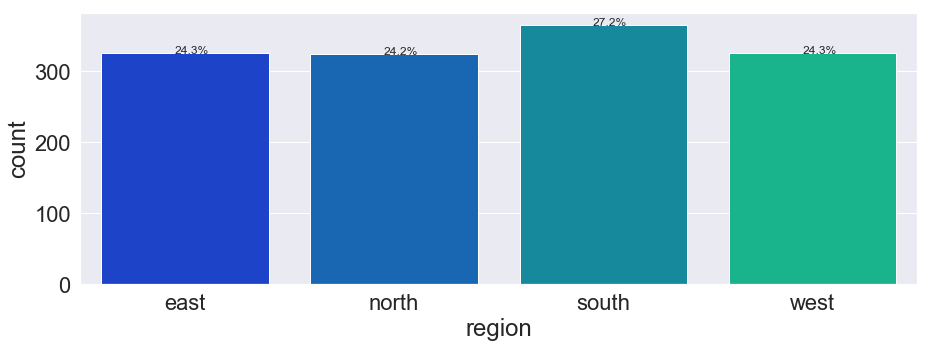

In [32]:
###
# 3. Univariate Analysis of Categorical Variables
###
# Creating Count Plot based on Region
#
plt.figure(figsize=(15,5))
ax = sns.countplot(df["region"],palette="winter")
bar_perc(ax,df["region"])

In [33]:
###
# South is favourite region, maximum beneficiaries are from this area - 27+%
# Other three region have 24+% insured members.
# Overall fair distribution but nearly 3% difference with South is statistically significant.
###

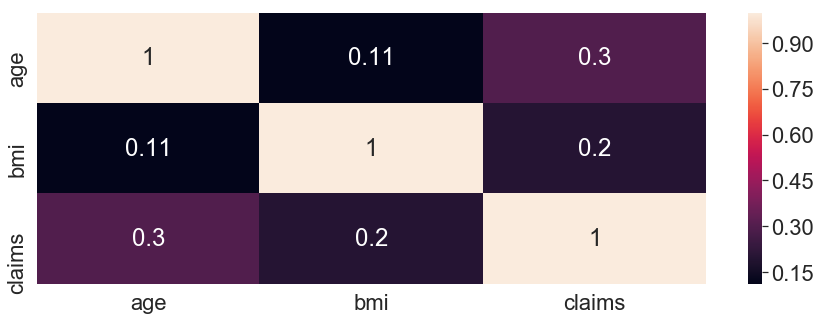

In [34]:
###
# 4. Bivariate Analysis
###
#
# Heatmap of all Integer Variables
#
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [35]:
###
# Correlation between all the variables is Positive but not so high that we don't fine much impact.
###
# The Correlation value is 1 means there is its linear trend between the two variables. 
# When the Correlation value is close to 1 the correlation is the more positive, means one variable increases so does other.
# The Correlation value is close to ZERO means there is no linear trend between the two variables. 
# When the Correlation value is closer to -1, the correlation is negative.
# Means, instead of both increasing one variable will decrease as the other increases. 
#

<function matplotlib.pyplot.show(*args, **kw)>

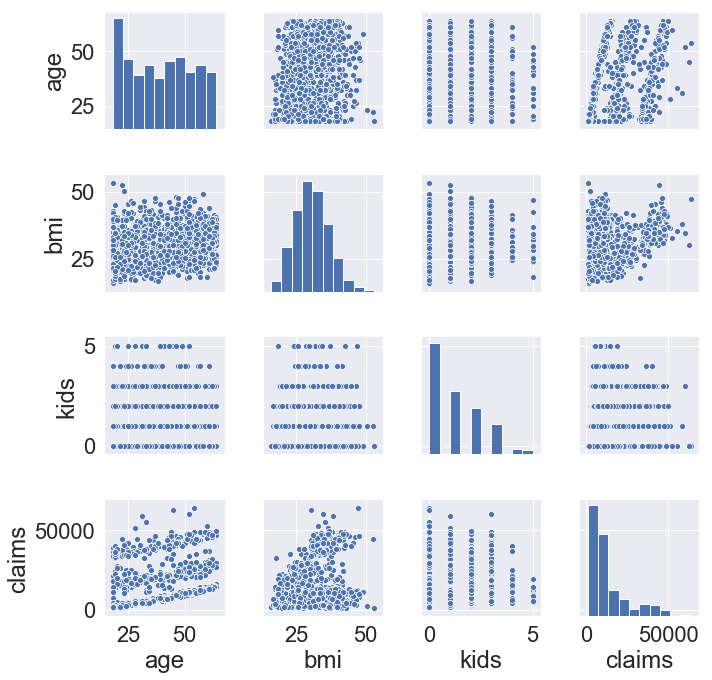

In [36]:
###
# 4. Bivariate Analysis
###
#
# Bivariate Distribution Of Every Possible Attribute Pair using Pairplot
#
sns.pairplot(df)
plt.show

In [37]:
###
#
# Age/Claims - 
# There is an interesting pattern between Age and Claims. Seems slightly, as Age increase, Claims value is increasing.
# It is possible that for the same ailment, older people are charged more than the younger ones.
#
# BMI/Claims -
# As per observation, more the BMI, higher the Claims. BMI above 25 having more Claims and higher Claims as well.
#
# Kids/Claims -
# Strange that beneficiaries with zero kids have claims upto Max claim price. And
# beneficiaries with 4 and 5 kids claims are limited.
#
# Age/Kids & BMI/Kids - Not much impact to observe.
#
# Age/BMI - It's observed that even at Young age, BMI showing very high like obsessed for few.

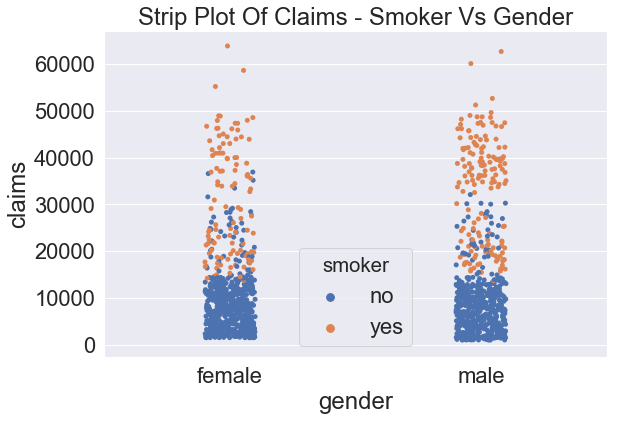

In [40]:
###
# Strip Plot of Claims - Smoker vs Gender
###
#
plt.figure(figsize=(9,6))
sns.stripplot(x="gender",y="claims",data=df,hue="smoker")
plt.title("Strip Plot Of Claims - Smoker Vs Gender")
plt.show()

In [ ]:
###
# Strip Plot clearly shows that Smoker has an strong impact on Claims Value but there is not impact due to Gender.
###

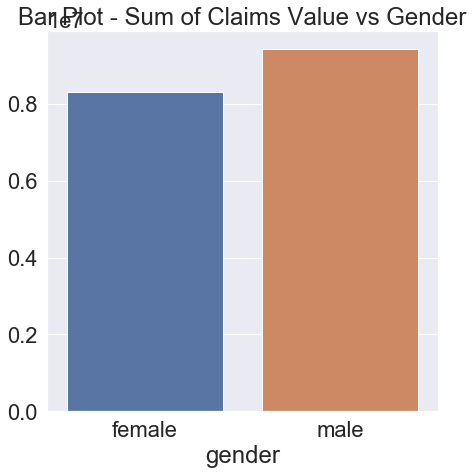

gender
female    8.321061e+06
male      9.434764e+06
Name: claims, dtype: float64


In [46]:
###
# Bar Chart Of Claims vs Gender (Sum & Counts)
###
#
plt.figure(figsize=(7,7))
summary=df.groupby('gender')['claims'].sum()
sns.barplot(x=summary.index, y=summary.values)
plt.title(label="Bar Plot - Sum of Claims Value vs Gender")
plt.show()
print(summary)

In [ ]:
###
# Bar Plot - Sum of Claims Value vs Gender
# Sum Of Claims are appearent that MALEs have higer claims in Total compare to Females.
###

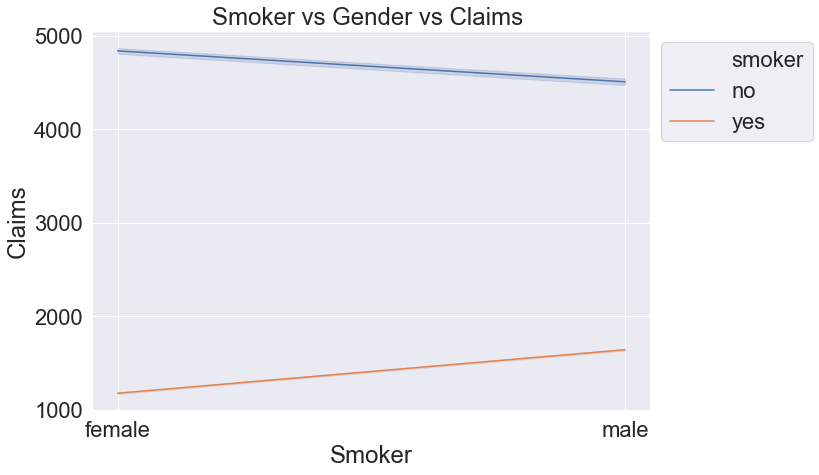

In [52]:
###
# 5. Multivariate Analysis
###
#
# Lineplot of all Integer Variables
#
plt.figure(figsize=(10,7))
#colors = ["green","red","cyan","black","pink","yellow","blue","maroon","grey","bright green","violet"]
colors = ["bright green","red","cyan"]
sns.lineplot(x=df["gender"],y=np.log1p(df["claims"]),estimator="sum",ci=95,hue=df["smoker"])
#log1p = log(x+1)
plt.ylabel("Claims")
plt.xlabel("Smoker")
plt.title("Smoker vs Gender vs Claims ")
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
###
# Line plot of Smoker Female vs Smoker Male vs Claims clearly shows
# Male or Female, when not smoking, claims lessor compared to those who are Smoking.
###

In [41]:
###
# 2. Prove (disprove) that Medical Claims made by the people who smoke is greater than those who don't.
###
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

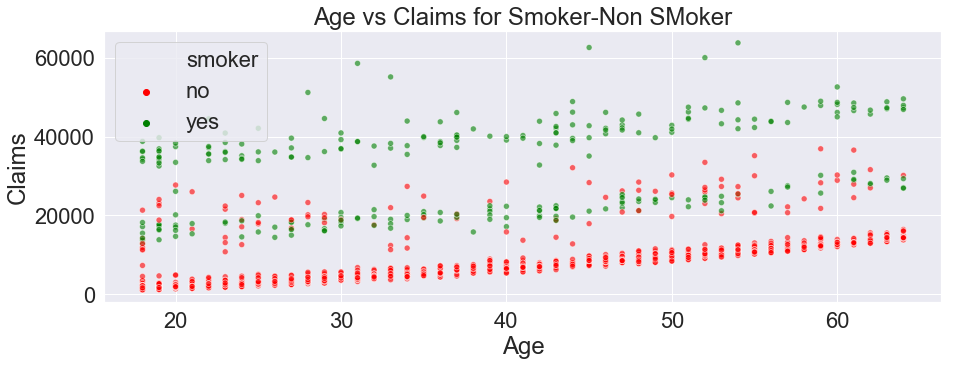

In [55]:
# Let's have Scatter Plot to study Smoker/Non-Smoker vs Medical Cost/Claims - Visual Evidence
# Across Different Ages
plt.figure(figsize=(15,5))
sns.scatterplot(df.age,df.claims,hue=df.smoker,palette=["red","green"],alpha=0.6)
plt.title("Age vs Claims for Smoker-Non SMoker")
plt.xlabel("Age")
plt.ylabel("Claims")
plt.show()


In [ ]:
# Visually the difference between charges of Smokers and Non-Smokers is appearent.
# The non-smokers have much lower medical bill claims compared to the smokers.
# We will have to perform Two sample T-Test (independent) to test to check if the mean charges of smokers 
# is significantly greater than the non-smokers.

In [ ]:
# A T-Test is a statistical test that is used to compare the means of two groups.
# A ANOVA-Test is to compare more than two groups (or if you want to do multiple pairwise comparisons).
# One-Tailed Test : 
# Example : SMOKER variable is one type of population.
# If you want to know whether one population mean is greater than or less than the other, this is one-tailed t-test.
# Two-Tailed Test :
# If you want to know the two populations are different from one another, perform a two-tailed t-test.
# Example : GENDER variable brings two type of population, Females and Males.d

# T-Test to check dependancy of Claims on Smoking Attribute
# Null Hypothesis = Ho = MEAN (Average) Claims of Smokers is Less Than or Equal To Non-Smokers
# Alternate Hypothesis = Ha = MEAN (Average) Charges of Smokers is Greater than Non-Smokers
# Significance Level = 0.05

In [58]:
Ho = "MEAN (Average) Claims of Smokers is Less Than or Equal To Non-Smokers"
Ha = "MEAN (Average) Claims of Smokers is Greater than Non-Smokers"
# Selecting Charges Corresponding To Smokers As An Array
sx = np.array(df[df.smoker == "yes"].claims)
# Selecting Charges Corresponding To Non-Smokers As An Array
sy = np.array(df[df.smoker == "no"].claims)
# Performing Individual T Test
t, p_value = stats.ttest_ind(sx,sy)
print(t,p_value)
# Since it is One Tailed Test
print("Tstat :",t,"P_Value :",p_value/2)
if p_value < 0.05:
    print("Reject the NULL Hypothesis that the Mean Claims of Smokers Is Less Than or Equal To Non-Smokers")
else:
    print("Failed to Reject the Null Hypothesis that the Mean Claims of Smokers is Greater Than Non-Smokers")

46.664921172723716 8.271435842177219e-283
Tstat : 46.664921172723716 P_Value : 4.1357179210886093e-283
Reject the NULL Hypothesis that the Mean Claims of Smokers Is Less Than or Equal To Non-Smokers


In [ ]:
###
# T-Test shows that Reject the NULL Hypothesis that the Mean Claims of Smokers Is Less Than or Equal To Non-Smokers.
# So, it is proved that Medical Claims made by the people who smoke is greater than those who don't.
###

In [ ]:
###
# 3. Prove (disapprove) with Statistical Evidence that the BMI of Females is different from that of Males.
###

In [44]:
df.gender.value_counts()

male      676
female    662
Name: gender, dtype: int64

In [45]:
###
# Mean BMI of Females
###
np.mean(df[df.gender=="female"].bmi)

30.377749244713023

In [46]:
###
# Mean BMI of Males
###
np.mean(df[df.gender=="male"].bmi)

30.943128698224832

In [47]:
###
# BMI of Females is 30.38, lessors than Males 30.94. But it is not that MAJOR difference.
###

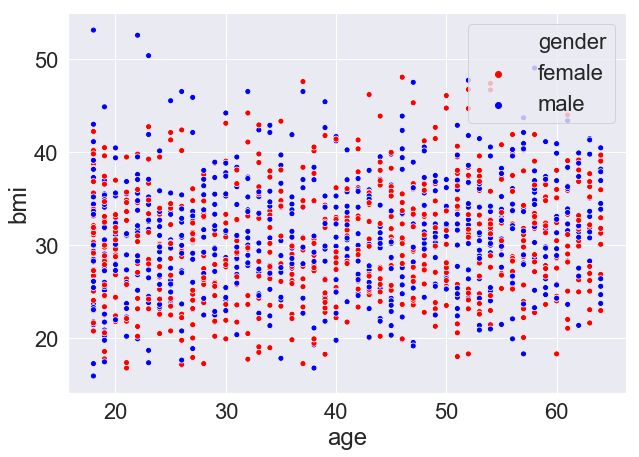

In [49]:
# Scatter Plot to look for Visual Evidence of Dependency between gender and BMI, across different ages
plt.figure(figsize=(10,7))
sns.scatterplot(df.age,df.bmi,hue=df.gender,palette=["red","blue"])
plt.show()

In [50]:
###
# Visually, there seems to be no appearent relationship between Gender and BMI
###

In [53]:
# Let's perform the T-Test to check if this result is statistically significant or just by random chance.
# NULL HYPOTHESIS = Ho = Mean BMI of Females is same as that of males
# ALTERNATE HYPOTHESIS = Ha = Mean BMI of Females is different from males
# This will be Two Tailed Test
#
Ho = "Mean BMI of Females is same as that of males"
Ha = "Mean BMI of Females is different from males"
# Selecting Male BMI Values as an array to x
x = np.array(df[df.gender == "male"].bmi)
# Selecting Female BMI Values as an array to y
y = np.array(df[df.gender == "female"].bmi)
#
# Performing an independent Test
# Significance Level = 0.05
#
t, p_value = stats.ttest_ind(x,y)
print("P_Value = ",p_value)
if p_value < 0.05:
    print("Reject the NULL Hypothesis that the BMI Females same as that of BMI Males")
else:
    print("Failed to Reject the Null Hypothesis that the BMI Females is same as that of BMI Males")

P_Value =  0.08997637178984932
Failed to Reject the Null Hypothesis that the BMI Females is same as that of BMI Males


In [54]:
###
# As analysed earlier, thru scatter plot and extracting MEAN of BMI, there is no statistical difference in BMI of genders.
###

In [59]:
###
# 4. Is the proportion of smokers different across different regions?
###

In [60]:
pd.crosstab(df['smoker'],df['region']).T

smoker,no,yes
region,,
east,267,58
north,257,67
south,273,91
west,267,58


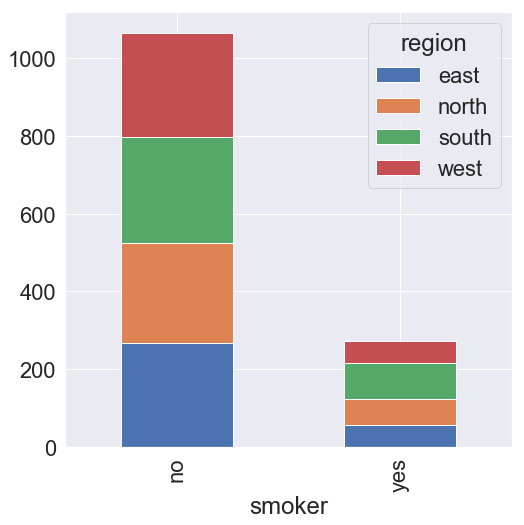

In [61]:
pd.crosstab(df['smoker'],df['region']).plot(kind="bar",figsize=(8,8),stacked=True)

In [ ]:
###
# Appearantly, only South region has slight higer Smoker and Non-Smoker beneficiaries. 
# For other 3 regions looks close by numbers.
###

In [ ]:
###
# Chi-Sq test to check if Smoker vs Non-Smoker are different in different regions (kind of trend of regions)
###
#
# Null Hypothesis = Ho = Proportion Of Smokers Not Different Across Regions
# Alternate Hypothesis = Ha = Proportion of Smokers is Different Across Regions
# Significance Level = 0.05

In [96]:
Ho = "Proportion Of Smokers Not Different Across Regions"
Ha = "Proportion of Smokers is Different Across Regions"
#
# Creating Contingency Table of Smoker vs Region
crosstab = pd.crosstab(df['smoker'],df['region'])
#
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)
print(p_value)
if p_value < 0.05:
    print('Reject the Null Hypothesis that ' f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print('Failed To Reject the Null Hypothesis that ' f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

0.06171954839170547
Failed To Reject the Null Hypothesis that Proportion Of Smokers Not Different Across Regions as the p_value (0.062) > 0.05


In [ ]:
###
# As analysed earlier, thru Crosstab, there is no statistical difference in proportion of Smokers across regions.
# There is no trend line for Smoking habits in different regions; it all same/similar.
###

In [ ]:
###
# 5. Is the MEAN BMI of Women with no children, once child and two children the same ?
###

In [54]:
wd = df[df['gender']=="female"]

In [66]:
print("Females BMI With 0 Kids",round(np.mean(wd[wd.kids==0].bmi),2))
print("Females BMI With 1 Kid ",round(np.mean(wd[wd.kids==1].bmi),2))
print("Females BMI With 2 Kids",round(np.mean(wd[wd.kids==2].bmi),2))
print("Females BMI With 3 Kids",round(np.mean(wd[wd.kids==3].bmi),2))
print("Females BMI With 4 Kids",round(np.mean(wd[wd.kids==4].bmi),2))
print("Females BMI With 5 Kids",round(np.mean(wd[wd.kids==5].bmi),2))

Females BMI With 0 Kids 30.36
Females BMI With 1 Kid  30.05
Females BMI With 2 Kids 30.65
Females BMI With 3 Kids 30.44
Females BMI With 4 Kids 31.94
Females BMI With 5 Kids 30.62


In [82]:
###
# Females BMI with different kids (0,1,2,3,5) has no difference overall. 
# Females BMI with 5 kids is slight higher than others.
# Need to check thru statistical tests to find Significant Difference if there.
###

30.05265822784811

In [67]:
###
# Analysis of Variance test (ANOVA) to check the BMI value for Females having different number of Kids,
# are significantly different.
# Null Hypothesis = Ho = Females BMI With different kids is same/No of kids doesn't impact BMI
# Alternate Hypothesis = Ha = Females BMI with different kids is different/No of kids impact BMI
# Significance Level = 0.05
###
Ho = "Females BMI With different kids is same"
Ha = "Females BMI with different kids is different"
zero = wd[wd.kids==0]['bmi']
one  = wd[wd.kids==1]['bmi']
two  = wd[wd.kids==2]['bmi']
f_stat, p_value = stats.f_oneway(zero,one,two)
print(p_value)
if p_value < 0.05:
    print('Reject the Null Hypothesis that ' f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print('Failed To Reject the Null Hypothesis that ' f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

0.7158579926754841
Failed To Reject the Null Hypothesis that Females BMI With different kids is same as the p_value (0.716) > 0.05


In [ ]:
###
# Statistical Analysis suggest that there is no impact on BMI due to number of kids.
###

In [ ]:
###
# Conclusion :
# Analysis of 1338 observations of MaxGet Insurance firm with 7 variables 
# like Age, Gender, BMI, Kids, Claims, Region shows overall there is 
# no BIG impact due to kids region on Claims value.
# However, Higher BMI has Higher value claims in correlation at some scale. 
# Also, Higher Age has Higher value of BMI in correlation at some scale.
# 
# As per dataset, all the observations for adult only, upto age of 64.
# BMI ranges from 16 (lower) till 53 (outlier).
# Major beneficiaries have no kids compare to 1,2,3,4,5 kids beneficiaries.
# Smokers neihter have high impact on Claims value nor trending on regions.
# Gender and BMI has no correlation.
# Females BMI overall has no impact of how much kids they have.
###